## Question - 2

## Gamma Distribution
* $E(X)$ = $k\theta$
* Given $\theta=5.5, \ k=1$
* Mean is 5.5

In [63]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


def gamma_pdf(x,theta=5.5):
    return st.gamma.pdf(x,a=theta)


def metropolis_hastings(p_target, theta=5.5, gauss_param=(0,1), n_samples = 1000, no_iter=10000,tol = 1e-2):
    
    x = np.random.random(1)[0]
    mu, sigma = gauss_param                                            # mean and standard deviation
    k = 0
    x_burn = []
    samples = np.zeros((n_samples))
    ap_rates_burn = 0
    ap_rates_sample = 0
    mean = x
    
    # burn-in period
    while(abs(mean-theta) > tol and k< no_iter):
        x_new = x + np.random.normal(0,sigma,size=1)[0]
        rho = (p_target(x_new)/p_target(x))
        accept_prob = min(1,rho)
        x = np.random.choice(a=[x_new,x],p=[accept_prob,1-accept_prob])
        
        if x == x_new:
            ap_rates_burn+=1
            
        x_burn.append(x)
        mean = np.mean(x_burn)
        k+=1
        
    burn_in = k
    
    ap_rates_burn = ap_rates_burn/burn_in
    
    # sample collection period
    for j in range(n_samples):
        x_new = x + np.random.normal(0,sigma,size=1)[0]
        rho = (p_target(x_new)/p_target(x))
        accept_prob = min(1,rho)
        x = np.random.choice([x_new,x],p=[accept_prob,1-accept_prob])
        if x == x_new:
            ap_rates_sample+=1
            
        samples[j] = x
    
    ap_rates_sample = ap_rates_sample/n_samples
    
    return burn_in,x_burn[:burn_in],samples,ap_rates_burn,ap_rates_sample

In [64]:
n_samples = 1000
theta = 5.5
no_iter = 10000
tol = 1e-3

In [65]:
burn_in,x_burn,samples,ap_rates_burn,ap_rates_sample = metropolis_hastings(gamma_pdf, no_iter=no_iter,tol=tol)

In [66]:
burn_in

904

In [67]:
X = np.concatenate((x_burn,samples))

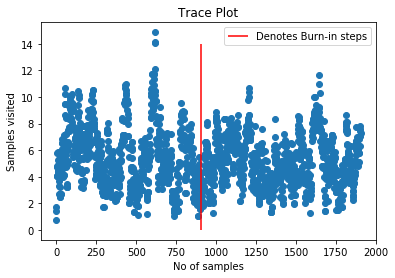

In [68]:
plt.scatter(np.arange(len(X)),X)
plt.vlines(x=burn_in,ymin=0,ymax=14,colors='red',label="Denotes Burn-in steps")
plt.title("Trace Plot")
plt.xlabel("No of samples")
plt.ylabel("Samples visited")
plt.legend()
plt.show()

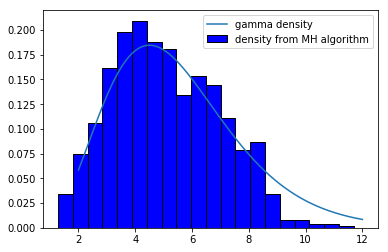

In [69]:
h = plt.hist(samples,density=True,label="density from MH algorithm",color = 'blue', edgecolor = 'black',bins=20)
xx = np.linspace(np.ceil(h[1][0]),np.ceil(h[1][-1]),n_samples)
plt.plot(xx,gamma_pdf(xx), label='gamma density')
plt.legend(loc='best')
plt.show()

In [71]:
print("Acceptance rate during Burn-in : {} and Sample Collection period: {}" .format(ap_rates_burn,ap_rates_sample))

Acceptance rate during Burn-in : 0.8373893805309734 and Sample Collection period: 0.853


In [95]:
sigmas = np.linspace(0.001,3,10)
burns=[]

In [96]:
for sigma in sigmas:
    burn_in,x_burn,samples,ap_rates_burn,ap_rates_sample = metropolis_hastings(gamma_pdf, no_iter=no_iter,tol=tol)
    print("Burn-in steps : {} for sigma : {}".format(burn_in,sigma))
    burns.append(burn_in)

Burn-in steps : 428 for sigma : 0.001
Burn-in steps : 6974 for sigma : 0.33422222222222225
Burn-in steps : 894 for sigma : 0.6674444444444445
Burn-in steps : 4447 for sigma : 1.0006666666666666
Burn-in steps : 867 for sigma : 1.333888888888889
Burn-in steps : 601 for sigma : 1.6671111111111112
Burn-in steps : 1670 for sigma : 2.0003333333333333
Burn-in steps : 84 for sigma : 2.333555555555556
Burn-in steps : 3648 for sigma : 2.666777777777778
Burn-in steps : 831 for sigma : 3.0



Optimal Sigma for fast convergence: 2.333555555555556


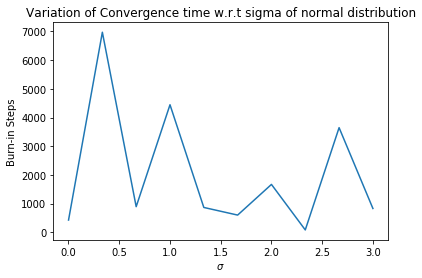

In [97]:
print("\nOptimal Sigma for fast convergence: {}".format(sigmas[np.argmin(burns)]))
plt.plot(sigmas,burns)
plt.ylabel('Burn-in Steps')
plt.xlabel("$\sigma$")
plt.title("Variation of Convergence time w.r.t sigma of normal distribution")
plt.show()